<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Import Packages
<a class="anchor" id="1"></a> 

In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

#Feature Extraction
from skimage.feature import hog

#Predict
from keras.utils import load_img, img_to_array
from keras.applications.inception_v3 import preprocess_input

# ML Model
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
import pickle

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

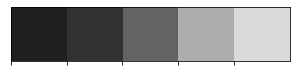

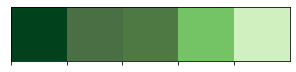

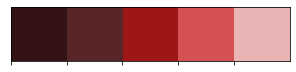

In [2]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Import Data
<a class="anchor" id="1"></a> 

In [3]:
labels = ['Bags','Belts','Boots','Dresses','Hats','Jackets & Coats','Jewelry','Knitwear','Loafers',
 'Pants','Sandals','Scarves','Skirt','Sneakers','Sunglasses','T-Shirts']

X = []
y_train = []

image_size = 400 

# All Data
for i in labels:
    folderPath = os.path.join(r"C:\Users\Zagreus\Documents\DUMMY\Dokumen Pribadi\College\Data Mining II\12.1. Scrap Fashion\Dataset",i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        try:
            img = cv2.resize(img,(image_size,image_size))
        except:
            print(i, j)
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        X.append(img)
        y_train.append(i)
print('Data train DONE!')

X = np.array(X)
y_train = np.array(y_train)

100%|██████████| 677/677 [00:10<00:00, 63.14it/s] 


Data train DONE!


In [4]:
len(X)

6304

In [5]:
len(y_train)

6304

## Sample Image

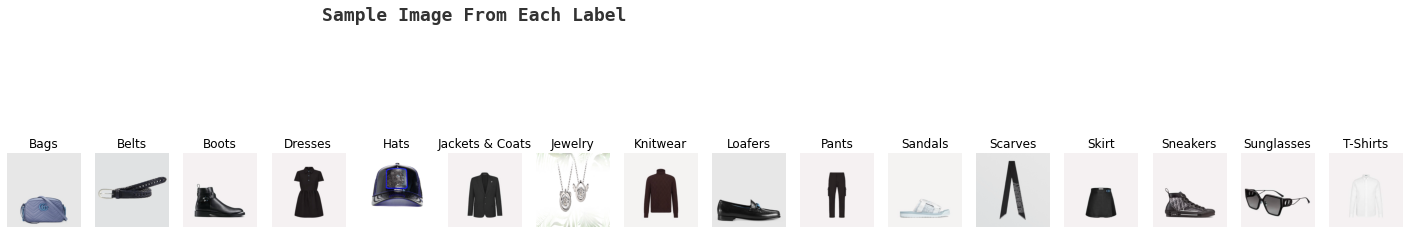

In [6]:
k=0
fig, ax = plt.subplots(1,len(labels),figsize=(25,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.3,alpha=0.8)
for i in labels:
    f=1
    while True :
        if y_train[f]==i:
            ax[k].imshow(X[f])
            ax[k].set_title(y_train[f])
            ax[k].axis('off')
            k+=1
            break
        f+=1

c:\Users\Zagreus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


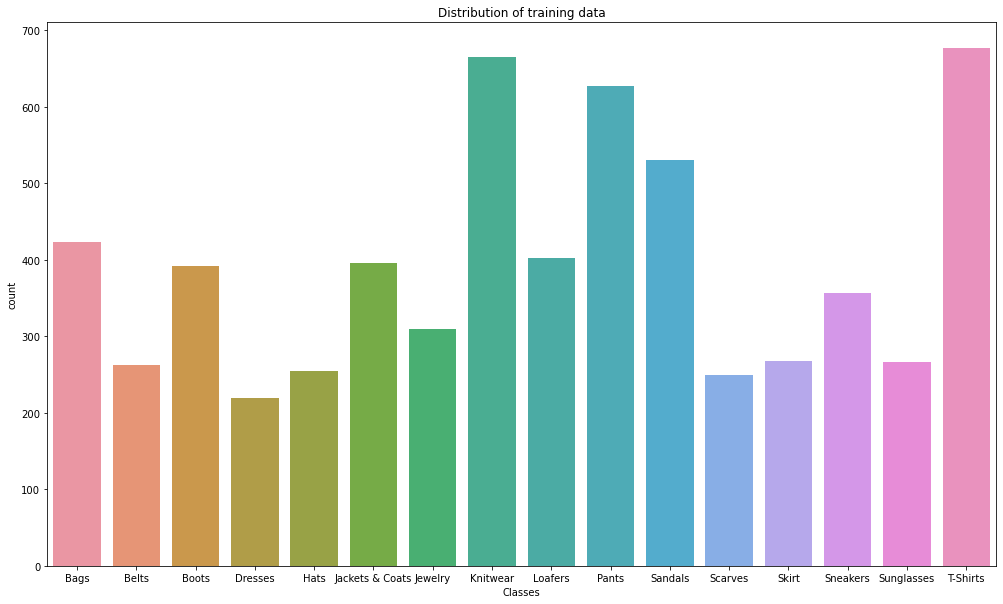

In [7]:
plt.figure(figsize=(17,10))
# Count plot for training set
sns.countplot(y_train.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()


<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Data Preprocessing
<a class="anchor" id="1"></a> 

### **Split Data**

In [8]:
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(X, y_train, train_size=0.8, random_state=42)

In [9]:
X_train = x_train.astype('float32') #set x_train data type as float32
X_test = x_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1

In [10]:
encoder = OrdinalEncoder()

y_train_ml = encoder.fit_transform(y_train.reshape(-1,1))
y_test_ml = encoder.fit_transform(y_test.reshape(-1,1))

In [11]:
print(len(X_train))
print(len(X_test))

5043
1261


### **Feature Extraction**

In [12]:
x_train_hog = []
x_train_hog_img = []
for i in range(len(X_train)):
    fd , hog_im = hog(X_train[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (4,4) , visualize = True ,  multichannel = True)
    x_train_hog.append(fd)
    x_train_hog_img.append(hog_im)
x_train_hog = np.array(x_train_hog)
x_test_hog = []
x_test_hog_img = []
for i in range(len(X_test)):
    fd , hog_im = hog(X_test[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (4,4) , visualize = True ,  multichannel = True)
    x_test_hog.append(fd)
    x_test_hog_img.append(hog_im)
x_test_hog = np.array(x_test_hog)

C:\Users\Zagreus\AppData\Local\Temp\ipykernel_14556\3803902458.py:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd , hog_im = hog(X_train[i] , orientations=9 , pixels_per_cell = (8,8),
C:\Users\Zagreus\AppData\Local\Temp\ipykernel_14556\3803902458.py:12: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd , hog_im = hog(X_test[i] , orientations=9 , pixels_per_cell = (8,8),


### **Comparing x_train_hog and x train  image**

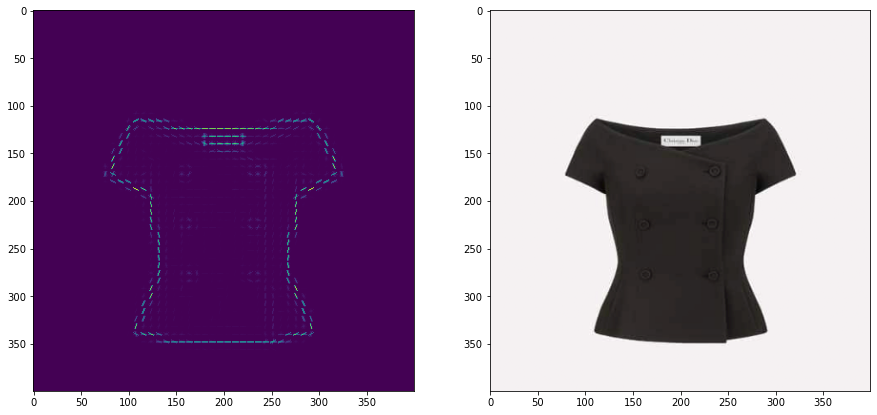

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(x_train_hog_img[10])
plt.subplot(1,2,2)
plt.imshow(X_train[10])

plt.show()

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Modelling With Machine Learning
<a class="anchor" id="1"></a> 


### **Machine Learning**

In [14]:
x_train_ml = x_train.reshape(x_train.shape[0], -1)
x_test_ml = x_test.reshape(x_test.shape[0], -1)
# x_train_ml = x_train.flatten()
# x_test_ml = x_test.flatten()

### **Naive Bayes**

In [15]:
MNB = MultinomialNB()
MNB.fit(x_train_hog, y_train_ml)
predictions = MNB.predict(x_test_hog)
print(classification_report(y_test_ml, predictions, digits=6))

c:\Users\Zagreus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0   0.684211  0.787879  0.732394        99
         1.0   0.375000  0.473684  0.418605        19
         2.0   1.000000  0.576923  0.731707        26
         3.0   0.650000  0.270833  0.382353        48
         4.0   0.500000  0.133333  0.210526        15
         5.0   0.420000  0.256098  0.318182        82
         6.0   0.466667  0.166667  0.245614        42
         7.0   0.477941  0.596330  0.530612       109
         8.0   0.800000  0.148148  0.250000        27
         9.0   0.689024  0.843284  0.758389       134
        10.0   0.647059  0.478261  0.550000        23
        11.0   0.416667  0.312500  0.357143        16
        12.0   0.298077  0.508197  0.375758        61
        13.0   0.517857  0.935484  0.666667        62
        14.0   0.906250  0.707317  0.794521        41
        15.0   0.658730  0.568493  0.610294       146

    accuracy                       0.572632       950
   macro avg   0.594218  0

### **SVM**

In [15]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train_hog , y_train_ml)
pickle.dump(SVM, open('model SVM.sav', 'wb'))
# loaded_model = pickle.load(open('model SVM.sav', 'rb'))

MemoryError: Unable to allocate 12.0 GiB for an array with shape (5043, 318096) and data type float64

In [ ]:
predictions = SVM.predict(x_test_hog)
print(classification_report(y_test_ml, predictions, digits=6))

              precision    recall  f1-score   support

         0.0   0.967742  0.909091  0.937500        99
         1.0   1.000000  0.894737  0.944444        19
         2.0   1.000000  0.923077  0.960000        26
         3.0   0.787234  0.770833  0.778947        48
         4.0   1.000000  0.666667  0.800000        15
         5.0   0.813559  0.585366  0.680851        82
         6.0   0.947368  0.857143  0.900000        42
         7.0   0.518072  0.788991  0.625455       109
         8.0   0.961538  0.925926  0.943396        27
         9.0   0.900709  0.947761  0.923636       134
        10.0   0.842105  0.695652  0.761905        23
        11.0   1.000000  0.562500  0.720000        16
        12.0   0.769231  0.655738  0.707965        61
        13.0   0.937500  0.967742  0.952381        62
        14.0   1.000000  0.975610  0.987654        41
        15.0   0.813793  0.808219  0.810997       146

    accuracy                       0.824211       950
   macro avg   0.891178  0

### **XGboost**

In [ ]:
import xgboost
xgc = xgboost.XGBClassifier()
xgc.fit(x_train_hog, y_train_ml)#learning

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [ ]:
import xgboost
xgc = xgboost.XGBClassifier()
xgc.fit(x_train_hog, y_train_ml) #learning

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [ ]:
prdct = xgc.predict(x_test_hog)
print(classification_report(y_test_ml, prdct, digits=6))

              precision    recall  f1-score   support

         0.0   0.919192  0.919192  0.919192        99
         1.0   0.941176  0.842105  0.888889        19
         2.0   0.916667  0.846154  0.880000        26
         3.0   0.739130  0.708333  0.723404        48
         4.0   0.714286  0.666667  0.689655        15
         5.0   0.691176  0.573171  0.626667        82
         6.0   0.894737  0.809524  0.850000        42
         7.0   0.543624  0.743119  0.627907       109
         8.0   0.920000  0.851852  0.884615        27
         9.0   0.850340  0.932836  0.889680       134
        10.0   0.882353  0.652174  0.750000        23
        11.0   0.800000  0.500000  0.615385        16
        12.0   0.734694  0.590164  0.654545        61
        13.0   0.892308  0.935484  0.913386        62
        14.0   0.952381  0.975610  0.963855        41
        15.0   0.807143  0.773973  0.790210       146

    accuracy                       0.792632       950
   macro avg   0.824950  0

### **Plot Random Sample to predict**

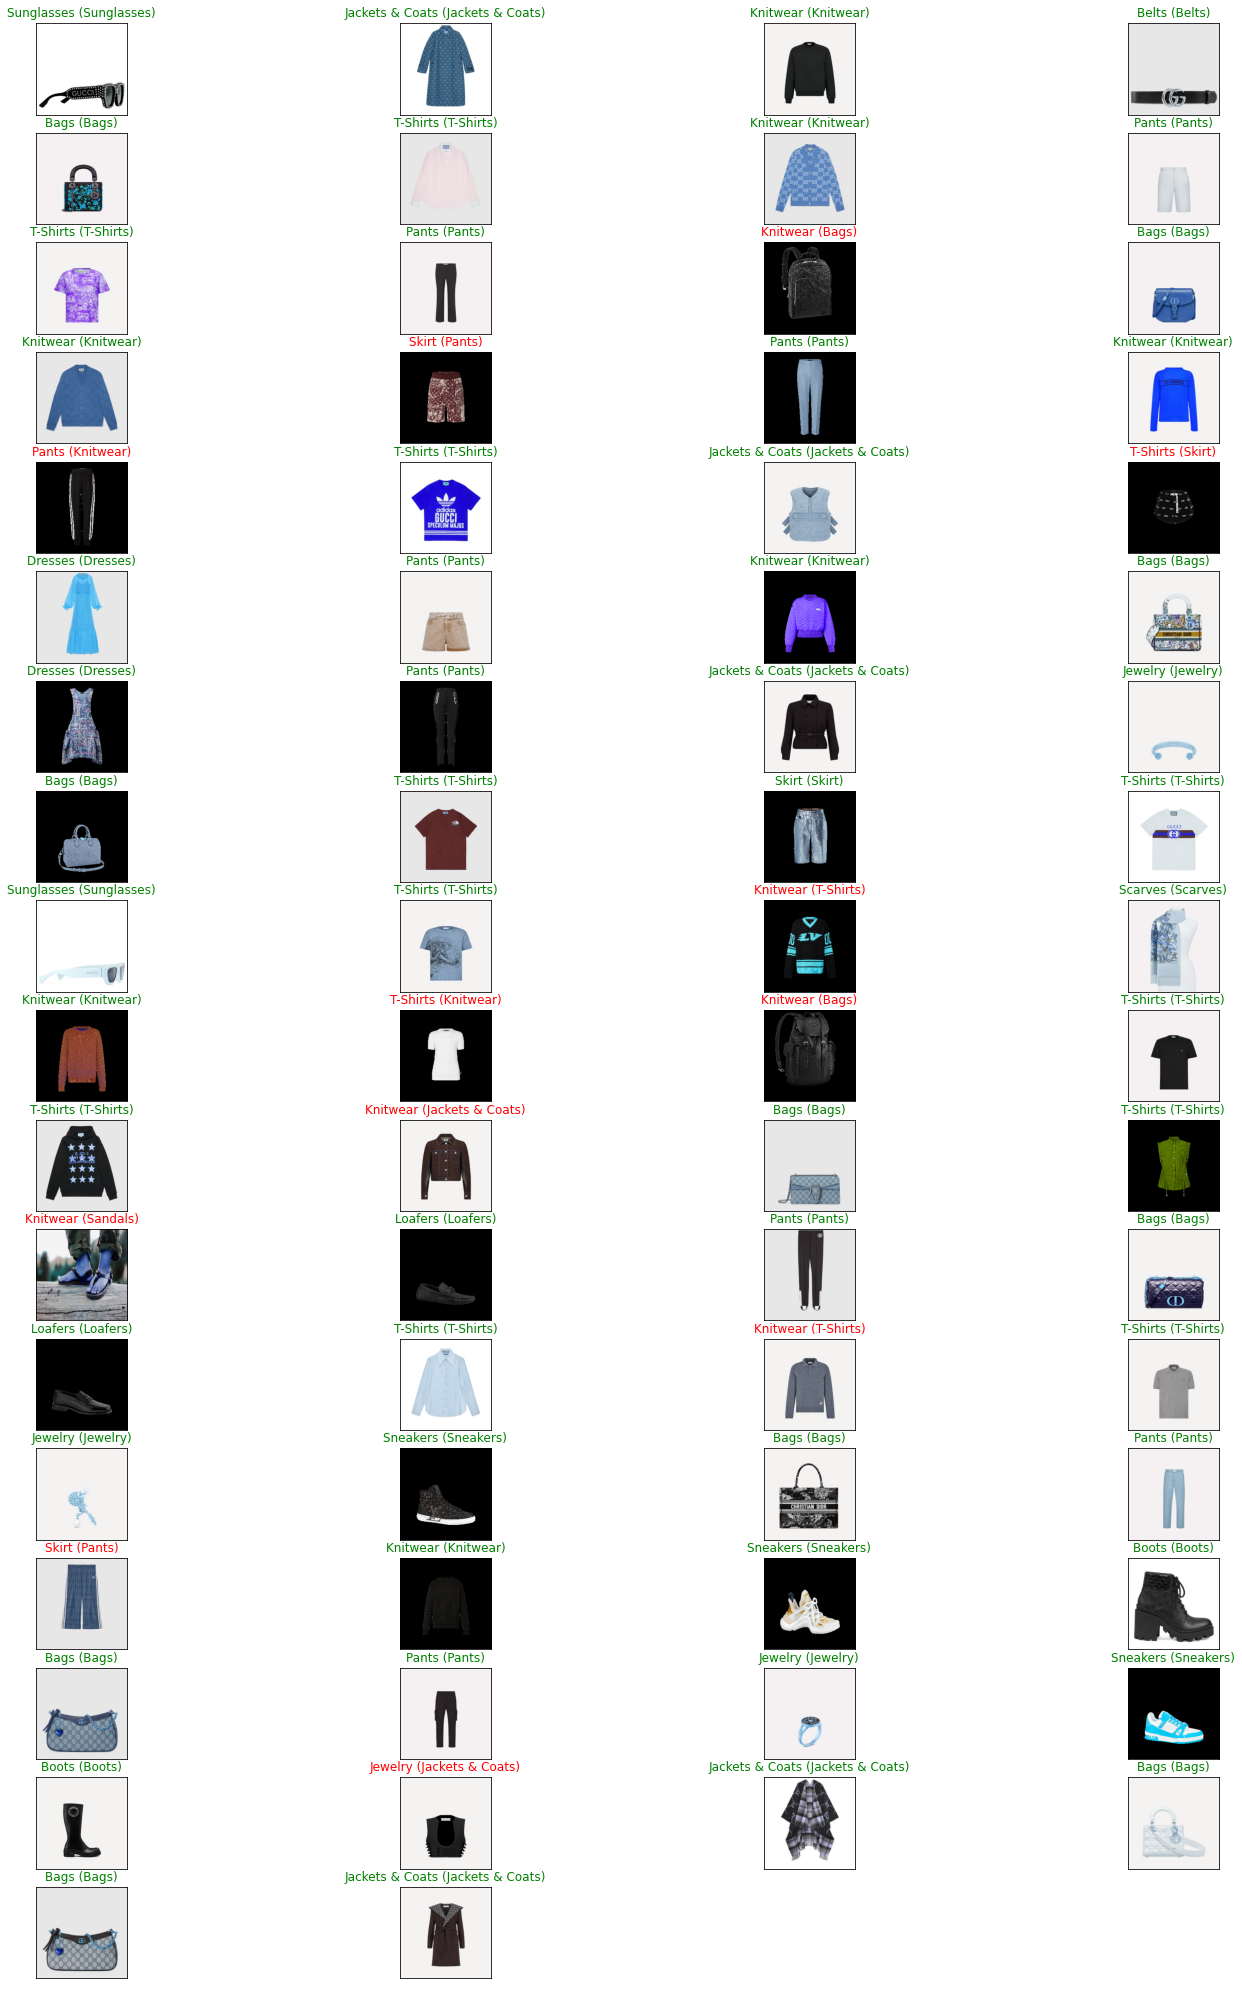

In [ ]:
y_hat = SVM.predict(x_test_hog)
# Plot a random sample of 54 test images, their predicted labels and ground truth
figure = plt.figure(figsize= (25, 40))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=70, replace=False)): # size (jumlah total data uji)
    ax = figure.add_subplot(20, 4, i + 1, xticks=[], yticks=[]) #ukuran 10 X 7 untuk visualisasi gambar pada heatmap confusion matrix
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = y_hat[index]
    true_index = y_test_ml[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[int(predict_index)], 
                                  labels[int(true_index)]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [62]:
image_pixels.shape

(250, 250, 3)

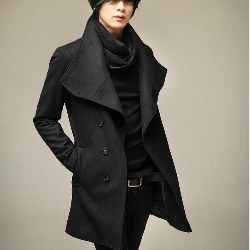

Label : Knitwear


In [25]:
# load an image from file
image = load_img('jackets.jpg', target_size=(250, 250))
# convert the image pixels to a numpy array
image_pixels = img_to_array(image)
# reshape data for the model
# image_reshape = image_pixels.reshape(image_pixels.shape[0], -1)

x_predict_hog = []
x_predict_hog_img = []
fd , hog_im = hog(image_pixels, orientations=9 , pixels_per_cell = (8,8),
                    cells_per_block = (2,2) , visualize = True ,  multichannel = True)
x_predict_hog.append(fd)
x_predict_hog_img.append(hog_im)
x_predict_hog = np.array(x_predict_hog)

yhat = SVM.predict(x_predict_hog)
result = labels[int(yhat[0])]
display(image)
print('Label :', result)